#HOMEWORK 4
Classifying MNIST using Multi-Layer Perceptron (MLP)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build an MLP model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons and ReLU activation
model.add(layers.Dense(64, activation='relu'))   # Dense layer with 64 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each digit) and softmax activation

In [4]:
# Compile the model, choose optimizer, loss and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model and save the history. Define epochs, batch_size and validation_split
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.3669 - accuracy: 0.8965 - val_loss: 0.1802 - val_accuracy: 0.9483
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.1439 - val_accuracy: 0.9569
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1079 - accuracy: 0.9682 - val_loss: 0.1241 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0965 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0870 - val_accuracy: 0.9745
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0401 - accuracy: 0.9883 - val_loss: 0.0865 - val_accuracy: 0.9746
Epoch 

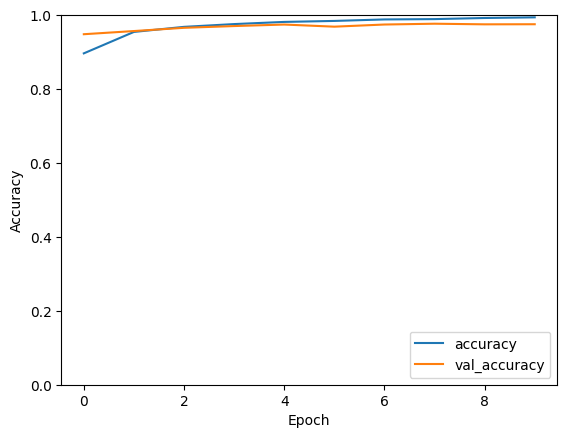

In [6]:
# Plot training & validation accuracy values and loss values per epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [7]:
# Evaluate the model on the test set and report test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9761
Test accuracy: 0.9761000275611877


313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9756
Test accuracy with 1 hidden layer(s): 0.975600004196167
313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9780
Test accuracy with 2 hidden layer(s): 0.9779999852180481
313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9777
Test accuracy with 3 hidden layer(s): 0.9776999950408936


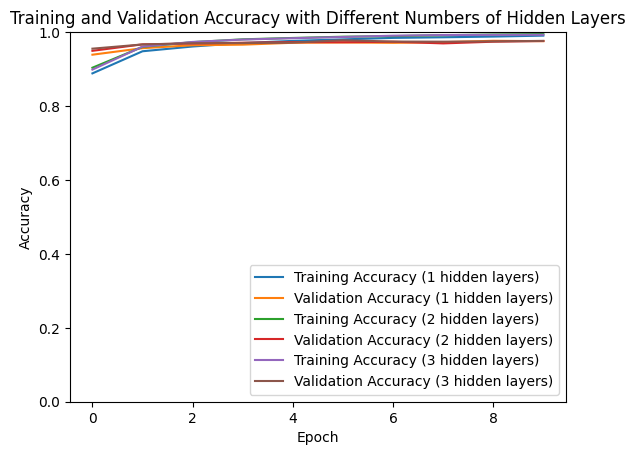

In [8]:
# Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance
num_hidden_layers_list = [1, 2, 3]

# Iterate over different numbers of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    # Build MLP model
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))  # Flatten the input images

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons and ReLU activation

    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each digit) and softmax activation

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy with {num_hidden_layers} hidden layer(s):', test_acc)

    # Plot training history
    plt.plot(history.history['accuracy'], label=f'Training Accuracy ({num_hidden_layers} hidden layers)')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({num_hidden_layers} hidden layers)')

# Plot settings
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Different Numbers of Hidden Layers')
plt.show()

In [9]:
# Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)
